In [4]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

#To get graph in your notebook
%matplotlib inline
#To supress warnings
import warnings
warnings.filterwarnings('ignore')

from matplotlib.pyplot import figure
print('Imported libraries successfully')

Imported libraries successfully


In [5]:
#Data in csv file was separated by ;, hence separator is specified.
file_path='https://raw.githubusercontent.com/dphi-official/Datasets/master/Wine_Dataset/winequality-red.csv'
data=pd.read_csv(file_path,sep=';')
print('Data imported successfully')

Data imported successfully


In [6]:
#To know how many rows and columns are present in dataset
data.shape

(1599, 12)

In [7]:
#To get an overview of how data is stored
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<p>Notice that the column names are in lower case and are quite long, hence renaming is required</p>

In [8]:
data=data.rename(columns={'fixed acidity':'Fixed Acidity','volatile acidity':"Volatile Acidity",'citric acid':'Citric Acid'
,'residual sugar':'Residual Sugar',"free sulfur dioxide":'Free SO2','total sulfur dioxide':'Total SO2','density':'Density',
'sulphates':'Sulphates','alcohol':'Alcohol'
})

In [9]:
data.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,chlorides,Free SO2,Total SO2,Density,pH,Sulphates,Alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Observations based on data.describe()
 * Median is nearly equal to mean for volatile acidity, density,pH <br>
    This implies that their are very less outliers
 * Mean is greater than median for fixed acidity, residual sugsr, free sulphur dioxise, total sulphur dioxide <br>
    This shows presence of outliers , to confirm this, we can use a boxplot

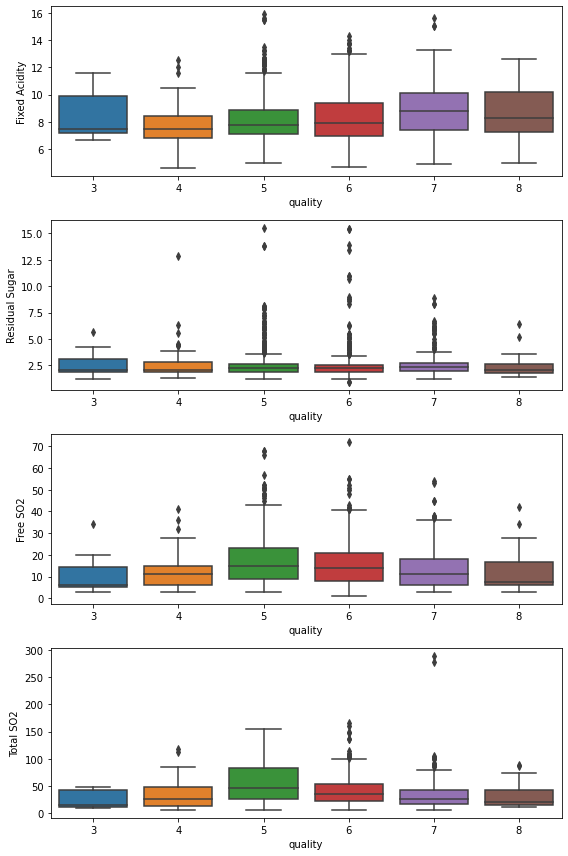

In [10]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(4,figsize=(8,12))
sns.boxplot(data['quality'],data['Fixed Acidity'],ax=ax1)
sns.boxplot(data['quality'],data['Residual Sugar'],ax=ax2)
sns.boxplot(data['quality'],data['Free SO2'],ax=ax3)
sns.boxplot(data['quality'],data['Total SO2'],ax=ax4)

plt.tight_layout()
plt.show()

In [11]:
temp=data['quality'].unique()
temp.sort()
print(temp)  #This tells us that quality score 1,2,9 are not present in dataset
print(data['quality'].value_counts())  #This tells us that scores 4,8,3 are awarded for very less points

[3 4 5 6 7 8]
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


To check for NA Values in each column

In [12]:
#Uff perfect, none of these columns have NA entries
data.isna().sum()

Fixed Acidity       0
Volatile Acidity    0
Citric Acid         0
Residual Sugar      0
chlorides           0
Free SO2            0
Total SO2           0
Density             0
pH                  0
Sulphates           0
Alcohol             0
quality             0
dtype: int64

Checking for duplicated entries, to avoid giving these records more weight in final prediction

In [13]:
'''Returns shape of dataframe that contains entries of duplicated values
We have not specified any particular column in duplicated() as it was not required'''
print(data[data.duplicated()].shape )

#To drop rows with duplicated values we use
data=data.drop_duplicates()
print(data[data.duplicated()].shape ) #To check if our method works

(240, 12)
(0, 12)


In [14]:
y=data['quality']
X=data.drop('quality',axis=1) #dropping quality column, as that would be our target

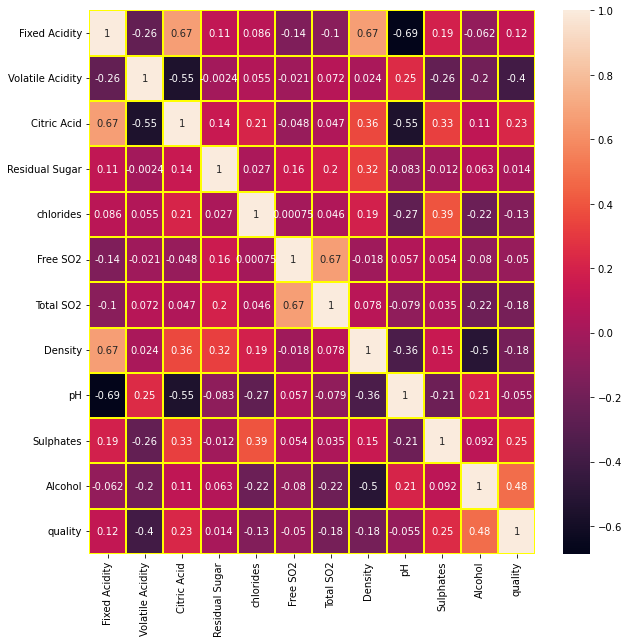

In [15]:
plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linecolor='yellow',linewidths=2)
plt.show()

We can see from the Heatmap that
 * Alcohol has high +ve correlation with fixed acidity, and high -ve correlation with acidity,sulphates,density and chlorides
 * Fixed acidity has +ve correlation with citric acid and density and high -ve correlation with pH
 * Citric acidity has high -ve correlation with Volatile Acidity and pH
 * Density has strong +ve correlation with fixed acidity, and has strong -ve correlation with Alcohol
 * Total SO2 and density have high +ve correlation

Analysis of distribution curves of variables

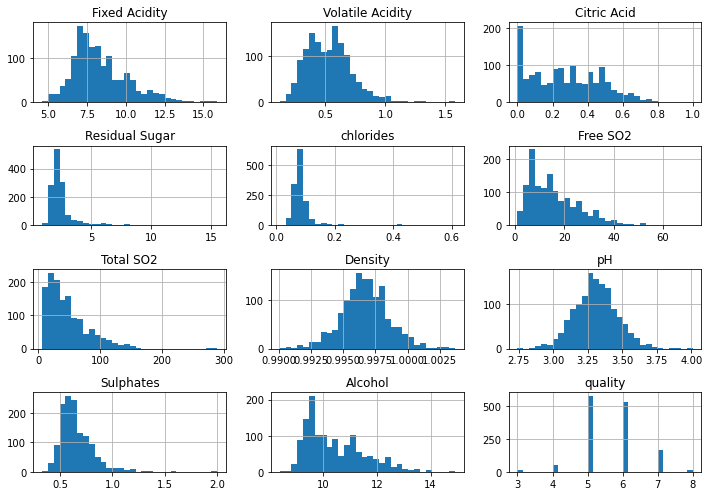

In [16]:
data.hist(bins=30,figsize=(10,7))
plt.tight_layout()
plt.show()

Bell Curve : Density, pH
*** 
 Right Skewed graphs : Total sulphur dioxide, Citric Acid